Support Vector Machine - Classificação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=['diagnosis'])

In [7]:
features.shape

(569, 30)

In [8]:
target.shape

(569, 1)

In [9]:
target.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


In [10]:
features.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [11]:
# Concatenar os dois DataFrames em um único 
# (para facilitar a visualização dos dados)
df = pd.concat([features, target], axis=1)

In [12]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [13]:
df.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

Visualização de Dados

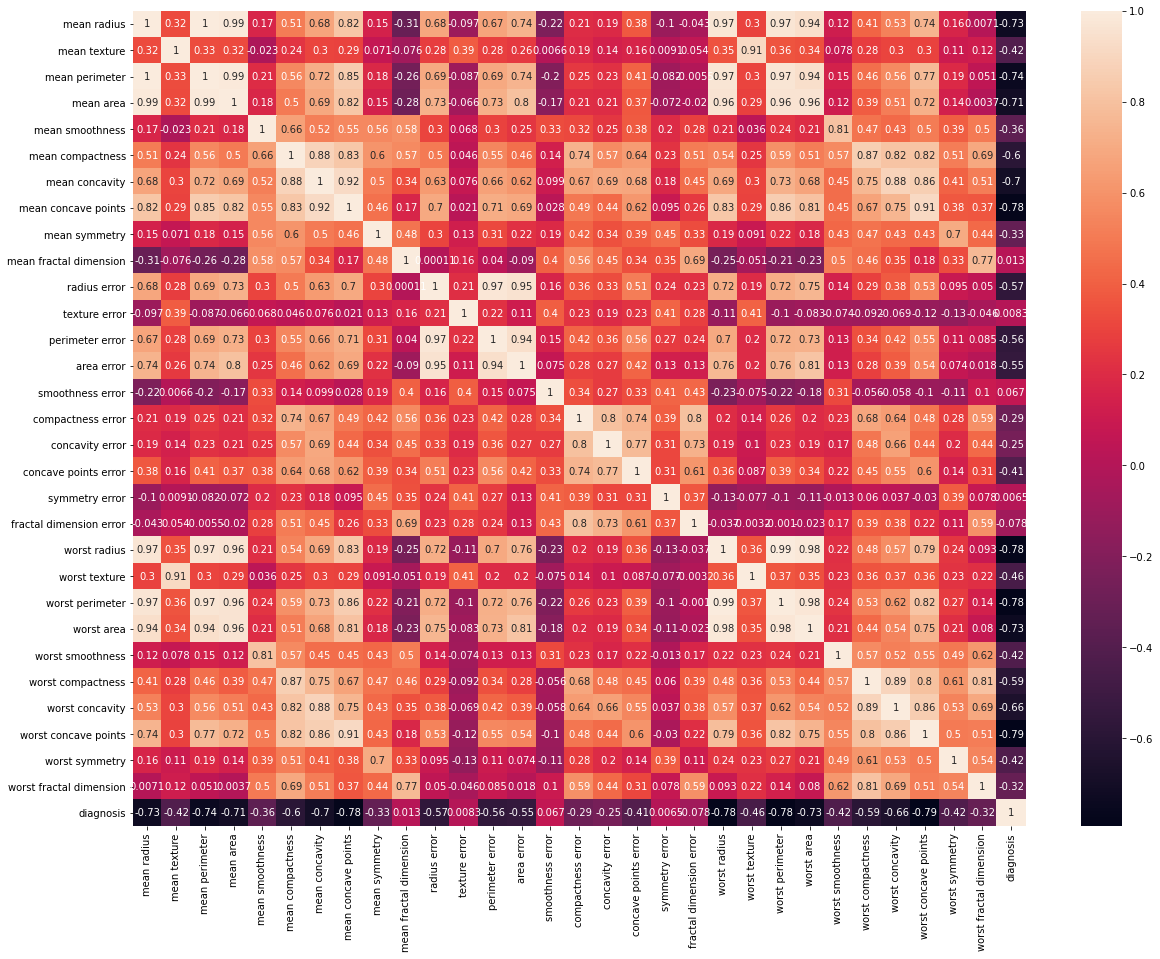

In [14]:
corr = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)

In [15]:
# Criação de lista com nomes de colunas relativos à média
# Solução do Daniel, usando regex
# newDF = df.filter(regex="mean \w+|diagnosis")

cols = [col for col in df.columns if 'mean' in col]
cols.append('diagnosis')

In [16]:
cols

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'diagnosis']

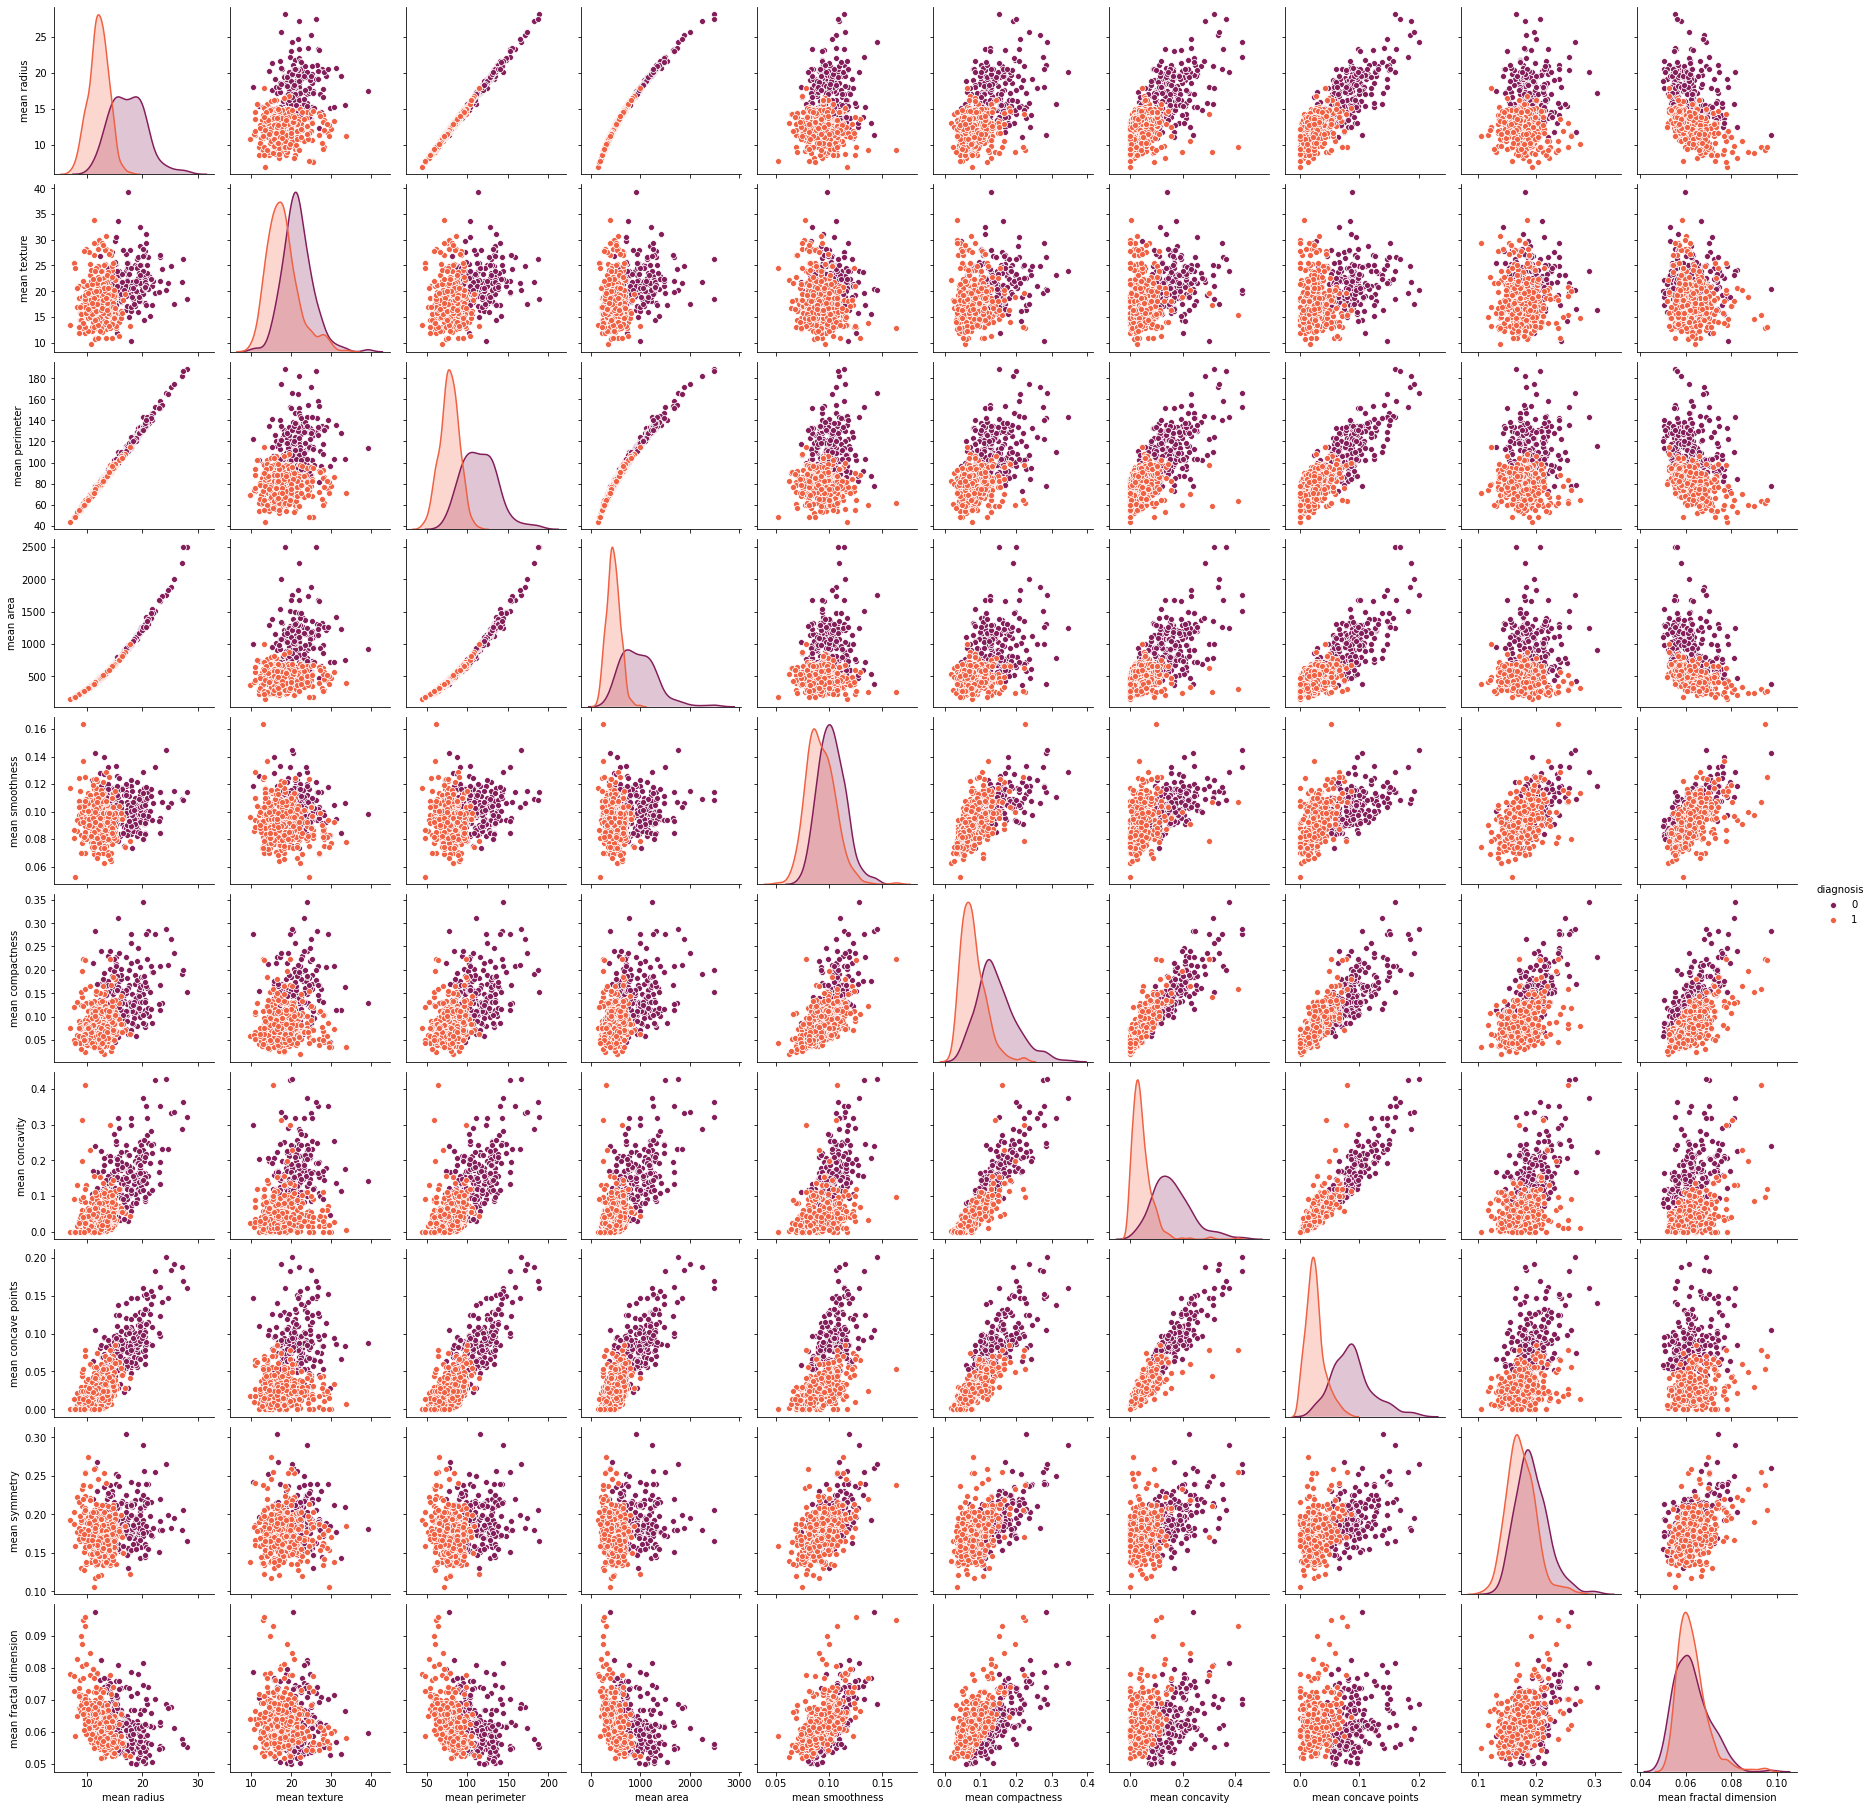

In [17]:
# sns.set_context() para diferentes configurações de figura
sns.pairplot(data=df[cols], hue='diagnosis', palette='rocket')

Escolha das features evitando colinearidade

In [ ]:
# Desafio: selecionar apenas as features que 
# possuem correlação menor que 0.9

In [18]:
feat_corr = features.corr()
mask = np.full(shape=(feat_corr.shape[0],), fill_value=True, dtype=bool)

In [19]:
for i in range(feat_corr.shape[0]): # Percorrendo a matriz de correlação
    for j in range(i+1, feat_corr.shape[0]):
        if feat_corr.iloc[i, j] >= 0.9: # Verificando o valor da correlação
            if mask[j] == True:
                mask[j] = False

In [20]:
selected_columns = features.columns[mask]
selected_columns.shape

(20,)

In [21]:
# Criando nosso DataFrame de features selecionadas
selected_features = features[selected_columns]

In [22]:
# Verificando as features selecionadas
selected_features.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

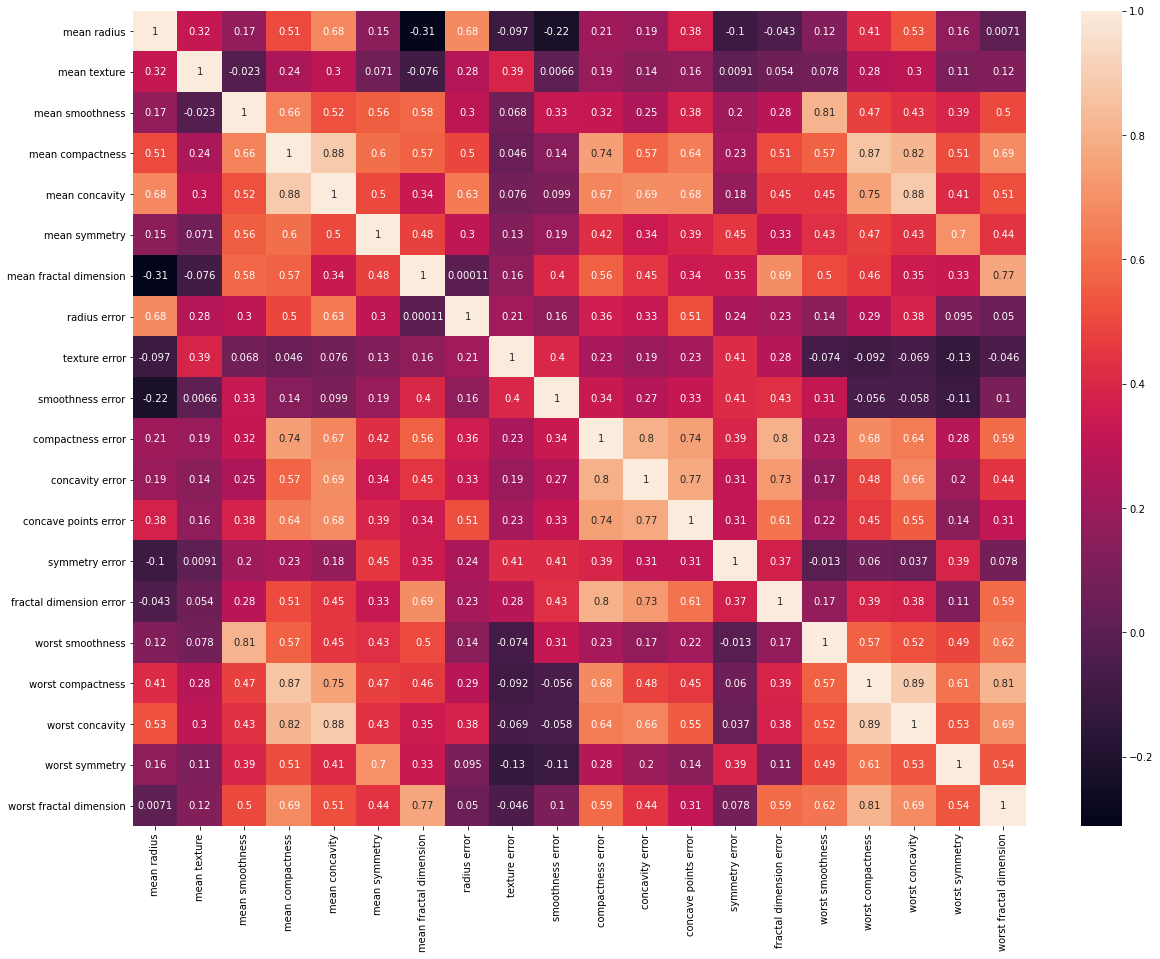

In [23]:
# Heatmap após remoção das features com alto grau de colinearidaade
corr = selected_features.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)

### Criação do modelo SVM para classificação

In [24]:
# Separação em conjuntos de treino e de teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, 
                                                   np.ravel(target),
                                                   test_size=0.3, 
                                                   random_state=10)

In [25]:
# Scalling dos dados
#from sklearn.preprocessing import MinMaxScaler # usar com dados com distribuição fortemente não normal
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Treinamento do modelo SVM
from sklearn.svm import SVC

model = SVC()

In [27]:
model.fit(X_train_scaled, y_train)

SVC()

In [28]:
# Fazendo predição
y_predicted = model.predict(X_test_scaled)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(confusion_matrix(y_test, y_predicted))

[[ 57   2]
 [  3 109]]


In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.9824561403508771

In [31]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        59
           1       0.98      0.97      0.98       112

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [42]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Buscando melhores parâmetros com GridSearch

In [43]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000],
             'gamma' : [0.0001, 0.001, 0.01, 1, 'scale']}

In [44]:
from sklearn.model_selection import GridSearchCV

In [51]:
grid = GridSearchCV(SVC(), param_grid, verbose=3, n_jobs=-1, cv=5)

In [52]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 1, 'scale']},
             verbose=3)

In [53]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [54]:
grid_predictions = grid.predict(X_test_scaled)

In [55]:
print(confusion_matrix(y_test, grid_predictions))

[[ 58   1]
 [  3 109]]


In [59]:
accuracy_score(y_test, grid_predictions)

0.9766081871345029

In [56]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        59
           1       0.99      0.97      0.98       112

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171

